## Практика 1, частина 2. Дещо про розподіли та довірчи еліпси

Бажано подивитись:  [ститистика](https://scipy.github.io/devdocs/reference/stats.html) та [багатовимірний аналіз](https://scipy.github.io/devdocs/reference/stats.html)

Як обчислювати базові характеристики на прикладі хі-квадрат розподілу: [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html)

На прикладі нормального розподілу: [тут](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)

Перейдем до багатовимірного нормального розподілу. Нам потрібно надалі 

1) вміти графічно зображати проекцію даних на $XOY$ 

2) будувати довірчи еліпсоїди. 

Деталі можно почитати [тут](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html), [тут](https://matplotlib.org/devdocs/gallery/statistics/confidence_ellipse.html)  і [тут](https://matplotlib.org/devdocs/gallery/statistics/confidence_ellipse.html#different-number-of-standard-deviations)

Задамо спочатку вектор середніх та матрицю коваріацій. Потім згенеруємо вибірку з цими параметрами та зобразимо графічно на площині. 

[ 1.40335516 -0.50204583 -1.04971942 ...  3.15636478 -0.14772241
 -1.7027264 ] [-0.94102317  0.27690554 -1.05702678 ...  1.39545754  3.06405006
 -6.33425601]


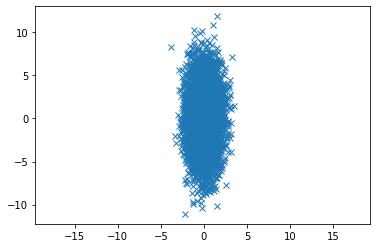

In [9]:
mean = [0, 0]
cov = [[1, 0], [0, 10]] 
x, y = np.random.multivariate_normal(mean, cov, 5000).T # Т означає транспоновану матрицю 
print(x,y)
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

Побудуємо тепер ''довірчий еліпс''. 

In [16]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

Див. [посилання](https://matplotlib.org/devdocs/gallery/statistics/confidence_ellipse.html#different-number-of-standard-deviations): 

In [13]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


Спочатку будуємо елліпсоїд при $\sigma_1=\sigma_2=1$. Потім цей елліпсоїд розрягуємо і зміщуємо.  Розглянемо приклад. Ми побудуємо довірчи елліпси рівня $\sigma$, $2\sigma$, $3\sigma$. 

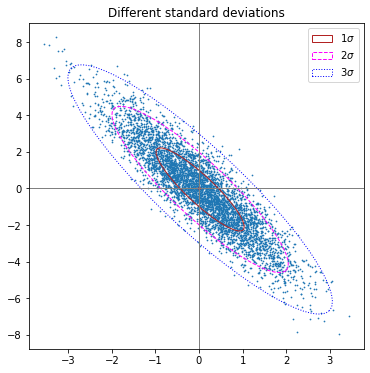

In [17]:
fig, ax_nstd = plt.subplots(figsize=(6, 6))

dependency_nstd = [[0.8, 0.75],
                   [-0.2, 0.35]]
mu = 0, 0
scale = 8, 5

ax_nstd.axvline(c='grey', lw=1)
ax_nstd.axhline(c='grey', lw=1)

x, y = np.random.multivariate_normal(mean, cov, 5000).T
ax_nstd.scatter(x, y, s=0.5)

confidence_ellipse(x, y, ax_nstd, n_std=1,
                   label=r'$1\sigma$', edgecolor='firebrick')
confidence_ellipse(x, y, ax_nstd, n_std=2,
                   label=r'$2\sigma$', edgecolor='fuchsia', linestyle='--')
confidence_ellipse(x, y, ax_nstd, n_std=3,
                   label=r'$3\sigma$', edgecolor='blue', linestyle=':')

ax_nstd.scatter(mu[0], mu[1], c='red', s=3)
ax_nstd.set_title('Different standard deviations')
ax_nstd.legend()
plt.show()